In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In the following step we are using cleaned images as inputs and painted images generated from ImageJ as masks. We Initially used thresholded images as masks but we could not get satisfactory results. You can observe the results for thresholded images by changing the directory from painted images to thresholded images.

In [ ]:
#importing required packages
from tqdm import tqdm
import cv2
import glob
import skimage.io as io
from skimage.transform import resize
from skimage.io import imread, imshow
from google.colab.patches import cv2_imshow
import numpy as np
my_epochs = 20 #setting epochs on network to be 20
img_dims = 256 #image size
batch_size = 32 #batchsize for the network
X_train = []
Y_train = []
#accessing all the cleaned images which we use as inputs and painted images generated from ImageJ tool as masks.
i_path = 'sarcopenia-ai-master/Deblurred_Outputs/*.jpg'
m_path = 'sarcopenia-ai-master/deOutputs/*.jpg'
for filename in glob.glob(i_path):
  img = cv2.imread(filename)
  train_imgs = resize(img, (img_dims,img_dims, 3), mode='constant', preserve_range=True)
  X_train.append(list(train_imgs))
for filename in glob.glob(m_path):
  img = cv2.imread(filename)
  mask_imgs = resize(img, (img_dims, img_dims, 1), mode='constant', preserve_range=True)
  Y_train.append(list(mask_imgs))

In [ ]:
#importing required packages
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
#s)
#defining inputs for the network
inputs = tf.keras.layers.Input((img_dims, 3))

For this segmentation CNN approach we followed Yunzhi wang and team approach where they used combination of CONV2D, Maxpooling and Upsampling layers. But we were initially getting shape errors with Conv2D so we proceeded with Conv1D. Here also max pooling and upsampling were not working. So we just used five Conv1D layers. 

In [ ]:

c1 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(rate=0.2)(c1)
c1 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c1)
# c1 = tf.keras.layers.MaxPooling1D(pool_size=2)(c1)


# #second convolutional block
c2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c1)
c2 = tf.keras.layers.Dropout(rate=0.2)(c2)
c2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c2)
# # c2 = tf.keras.layers.MaxPooling1D(pool_size=2)(c2)

# # # #third convolutional block
c3 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(c2)
c3 = tf.keras.layers.Dropout(rate=0.2)(c3)
c3 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(c3)
# # c3 = tf.keras.layers.MaxPooling1D(pool_size=2)(c3)

# # # #Upsampling and fourth convolutional block
# # u1 = tf.keras.layers.UpSampling1D(size=2)(c3) 
# # u1 = tf.keras.layers.concatenate([u1, c1], axis=-1)
c4 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c3)
c4 = tf.keras.layers.Dropout(rate=0.2)(c4)
c4 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c4)

# # # # c4 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c3)
# # # # c4 = tf.keras.layers.Dropout(rate=0.2)(c4)
# # # # c4 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(c4)
# # # # c4 = tf.keras.layers.MaxPooling1D(pool_size=2)(c4)
# # # # #Upsampling and fifth convolutional block
# # u2 = tf.keras.layers.UpSampling1D(size=2)(c4) 
# # # u2 = tf.keras.layers.concatenate([u2, c1], axis=-1)
c5 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c4)
c5 = tf.keras.layers.Dropout(rate=0.2)(c5)
c5 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c5)
# # c5 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c4)
# # c5 = tf.keras.layers.Dropout(rate=0.2)(c5)
# # c5 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(c5)
# # c5 = tf.keras.layers.MaxPooling1D(pool_size=2)(c5)

The follwing commented code is Conv1D with Maxpooling and Upsampling. You can uncomment and observe the results

In [ ]:
# c1 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu', padding='same')(inputs)
# c1 = tf.keras.layers.Dropout(rate=0.2)(c1)
# c1 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu', padding='same')(c1)
# c1 = tf.keras.layers.MaxPooling1D(pool_size=(2))(c1)

# #second convolutional block
# c2 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), activation='relu', padding='same')(c1)
# c2 = tf.keras.layers.Dropout(rate=0.2)(c2)
# c2 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), activation='relu', padding='same')(c2)
# c2 = tf.keras.layers.MaxPooling1D(pool_size=(2))(c2)

# #third convolutional block
# c3 = tf.keras.layers.Conv1D(filters=128, kernel_size=(3), activation='relu', padding='same')(c2)
# c3 = tf.keras.layers.Dropout(rate=0.2)(c3)
# c3 = tf.keras.layers.Conv1D(filters=128, kernel_size=(3), activation='relu', padding='same')(c3)
# c3 = tf.keras.layers.MaxPooling1D(pool_size=(2))(c3)


# cf = tf.keras.layers.Conv1D(filters = 256, kernel_size=(3), activation='relu', padding='same')(c3)
# cf = tf.keras.layers.Dropout(rate=0.2)(cf)
# cf = tf.keras.layers.Conv1D(filters= 256, kernel_size=(3), activation='relu', padding='same')(cf)

# cf = tf.keras.layers.MaxPooling1D(pool_size=(2))(cf) 

# #Upsampling and fourth convolutional block
# u1 = tf.keras.layers.UpSampling1D(size=(2))(cf) 
# u1 = tf.keras.layers.concatenate([c3, u1], axis=-1)
# c4 = tf.keras.layers.Conv1D(filters=128, kernel_size=(3), activation='relu', padding='same')(u1)
# c4 = tf.keras.layers.Dropout(rate=0.2)(c4)
# c4 = tf.keras.layers.Conv1D(filters=128, kernel_size=(3), activation='relu', padding='same')(c4)

# #Upsampling and fifth convolutional block
# u2 = tf.keras.layers.UpSampling1D(size=(2))(c4) 
# u2 = tf.keras.layers.concatenate([u2, c2], axis=-1)
# c5 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), activation='relu', padding='same')(u2)
# c5 = tf.keras.layers.Dropout(rate=0.2)(c5)
# c5 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), activation='relu', padding='same')(c5)
# #Upsampling and sixth convolutional block
# u3 = tf.keras.layers.UpSampling1D(size=(2))(c5) 
# u3 = tf.keras.layers.concatenate([u3, c1], axis=-1)
# c6 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu', padding='same')(u3)
# c6 = tf.keras.layers.Dropout(rate=0.2)(c6)
# c6 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu', padding='same')(c6)

# uf = tf.keras.layers.UpSampling1D(size=(2))(c6) 
# # uf = tf.keras.layers.concatenate([uf, c1], axis=-1)
# c7 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu', padding='same')(uf)
# c7 = tf.keras.layers.Dropout(rate=0.2)(c7)
# c7 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), activation='relu', padding='same')(c7)


The following commented code is our attempt for Conv2D. Conv2D did work when we changed the dimensions of the image. 
In this code:  train_imgs = resize(img, (img_dims,img_dims, 3) add one more channel and uncomment the follwing code to see how Conv2D works

In [ ]:
# c1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
# c1 = tf.keras.layers.Dropout(rate=0.2)(c1)
# c1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(c1)
# c1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c1)

# #second convolutional block
# c2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c1)
# c2 = tf.keras.layers.Dropout(rate=0.2)(c2)
# c2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c2)
# c2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c2)

# #third convolutional block
# c3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(c2)
# c2 = tf.keras.layers.Dropout(rate=0.2)(c3)
# c3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(c3)
# c3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c3)

# #Upsampling and fourth convolutional block
# u1 = tf.keras.layers.UpSampling2D(size=(2,2))(c3) 
# u1 = tf.keras.layers.concatenate([u1, c2], axis=-1)
# c4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(u1)
# c4 = tf.keras.layers.Dropout(rate=0.2)(c4)
# c4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(c4)

# #Upsampling and fifth convolutional block
# u2 = tf.keras.layers.UpSampling2D(size=(2,2))(c4) 
# u2 = tf.keras.layers.concatenate([u2, c1], axis=-1)
# c5 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(u2)
# c5 = tf.keras.layers.Dropout(rate=0.2)(c5)
# c5 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(c5)

In [ ]:
# defining outputs for network. The best result was produced for c1
outputs = tf.keras.layers.Conv1D(filters=1, kernel_size = 1, activation='sigmoid')(c1)

In [ ]:
# Creating model and compiling
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
model = tf.keras.Model(inputs, outputs )
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=optimizer, metrics=['accuracy'])
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
# checkpoint = ModelCheckpoint(filepath='xray_model.hdf5', save_best_only=True, save_weights_only=True)
# lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
checkpoint = ModelCheckpoint(filepath='xray_model.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, mode='min')
board = TensorBoard(log_dir='logs')

my_callbacks = [
    checkpoint,
    lr_reduce,
    early_stop,
    board
]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 3)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 256, 32)           320       
_________________________________________________________________
dropout (Dropout)            (None, 256, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 256, 32)           3104      
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 256, 1)            33        
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Splitting data into training and testing sets and fitting the model
from sklearn.model_selection import train_test_split

# dim=512
# images = np.array(images).reshape(len(images),dim,dim,1)
# masks = np.array(masks).reshape(len(masks),dim,dim,1)

train_images, validation_images, train_masks, validation_masks = train_test_split((train_imgs-127.0)/127.0, 
                                                            (mask_imgs>127).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_images, test_images, train_masks, test_masks = train_test_split(train_images,train_masks,
                                                            test_size = 0.1, 
                                                            random_state = 2018)

history = model.fit(x = train_images, y = train_masks, batch_size = 16,
                          validation_data =(test_images,test_masks), epochs = 20,
                          callbacks=my_callbacks)



# hist = model.fit(
#            X_train[0:10],Y_train[0:10],validation_split=0.1,
          
#             epochs=my_epochs,
#             callbacks=my_callbacks
# )
        
           

Epoch 1/20
13/13 [==============================] - 3s 202ms/step - loss: 0.6494 - accuracy: 0.7913 - val_loss: 0.6093 - val_accuracy: 0.9903
Epoch 2/20
13/13 [==============================] - 0s 15ms/step - loss: 0.6131 - accuracy: 0.9285 - val_loss: 0.5731 - val_accuracy: 0.9973
Epoch 3/20
13/13 [==============================] - 0s 15ms/step - loss: 0.5777 - accuracy: 0.9796 - val_loss: 0.5388 - val_accuracy: 0.9975

Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 4/20
13/13 [==============================] - 0s 14ms/step - loss: 0.5482 - accuracy: 0.9940 - val_loss: 0.5289 - val_accuracy: 0.9976


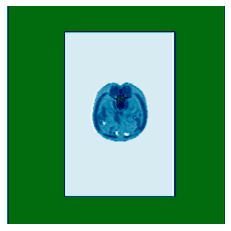

In [ ]:
#Performing prediction a particular image
from keras.preprocessing import image
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import numpy as np
from skimage.transform import resize

img_path = 'sarcopenia-ai-master/Deblurred_Outputs/deblur2.jpg'
img = io.imread(img_path)
img1 = resize(img , (256,256,3))

prediction = model.predict(img1)

plt.imshow(np.squeeze(prediction), cmap = 'ocean')
plt.savefig("seg3_4.jpg")
plt.axis('off')
plt.savefig("seg3_a_off.jpg") #saving the image. You can use a seperate folder to store the images
